# Business Case: Netflix - Data Exploration and Visualisation

# 1. Introduction

## What is Netflix?

Netflix, Inc. is an American subscription streaming service and production company. It offers a library of films and television series through distribution deals as well as its own productions, known as Netflix Originals. As of March 31, 2023, with an estimated `232.5 million` paid memberships in more than `190` countries, it is the most-subscribed video on demand streaming service.

Founded by Reed Hastings and Marc Randolph in Scotts Valley, California, Netflix initially operated as a DVD sales and rental business. However, within a year, it shifted its focus exclusively to DVD rentals. In 2007, the company introduced streaming media and video on demand services, marking a significant step in its evolution.


## Objective

Analyzing the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

## About Data

This tabular dataset consists of data as of `mid-2021`, about `8807` movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc. The data is available in a single csv file


## Features of the dataset:


| Feature | Description |
|:--------|:------------|
| Show ID | The ID of the show |
| Type | Identifier - A Movie or TV Show |
| Title | Title of the Movie / Tv Show |
| Director | Director of the Movie |
| Cast | Actors involved in the movie/show |
| Country | Country where the movie/show was produced |
| Date_added | Date it was added on Netflix |
| Release_year | Actual Release year of the movie/show |
| Rating | TV Rating of the movie/show |
| Duration | Total Duration - in minutes or number of seasons |
| Listed_in | Genre |
| Description | The summary description |

# 2.Exploratory Data Analysis

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import copy
from wordcloud import WordCloud

from google.colab import files

# Upload the file from your local system to Google Colab
uploaded = files.upload()

# loading the dataset
df = pd.read_csv('netflix.csv')

Saving netflix.csv to netflix (3).csv


In [2]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [4]:
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Insights
From the above analysis, it is clear that, data has total of 12 features with lots of mixed alpha numeric data. Also we can see missing data in 5 of the total columns.

## Statistical Summary

In [6]:
df.describe(include = 'object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Duplicate Detection

In [8]:
df.duplicated().value_counts()

,count
False,8807


### Insights
- There are no duplicate entries in the dataset

##  Sanity Check for columns

In [9]:
# checking the unique values for columns
for i in ['type','release_year','rating','duration']:
    print('Unique Values in',i,'column are :-')
    print(df[i].unique())
    print('-'*70)

Unique Values in type column are :-
['Movie' 'TV Show']
----------------------------------------------------------------------
Unique Values in release_year column are :-
[2020 2021 1993 2018 1996 1998 1997 2010 2013 2017 1975 1978 1983 1987
 2012 2001 2014 2002 2003 2004 2011 2008 2009 2007 2005 2006 1994 2015
 2019 2016 1982 1989 1990 1991 1999 1986 1992 1984 1980 1961 2000 1995
 1985 1976 1959 1988 1981 1972 1964 1945 1954 1979 1958 1956 1963 1970
 1973 1925 1974 1960 1966 1971 1962 1969 1977 1967 1968 1965 1946 1942
 1955 1944 1947 1943]
----------------------------------------------------------------------
Unique Values in rating column are :-
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']
----------------------------------------------------------------------
Unique Values in duration column are :-
['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 m

In [10]:
# checking the value_counts for columns
for i in ['type','release_year','rating','duration']:
    print('Value count in',i,'column are :-')
    print(df[i].value_counts())
    print('-'*70)

Value count in type column are :-
type
Movie      6131
TV Show    2676
Name: count, dtype: int64
----------------------------------------------------------------------
Value count in release_year column are :-
release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1961       1
1925       1
1959       1
1966       1
1947       1
Name: count, Length: 74, dtype: int64
----------------------------------------------------------------------
Value count in rating column are :-
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64
----------------------------------------------------------------------
Value count in duration column are :-
duration
1 Season     1793
2 Seasons     425
3 Seasons    

###  Insights
- There is presense of `3 unusual` values in `rating` column. We will replace them by NaN as below -

In [11]:
#  Let's check the data where rating or duration is null
df[df['rating'].isnull() | df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


we can see that rating data contains the duration, it can be because of data input error, we can move that data to the proper column

In [12]:
# Identify rows where 'rating' has a duration in minutes and 'duration' is missing
incorrect_duration_rows = df[df['rating'].str.contains('min', na=False) & df['duration'].isnull()]
incorrect_duration_rows

# # Move the misplaced 'duration' values in 'rating' to the 'duration' column
df.loc[incorrect_duration_rows.index, 'duration'] = df.loc[incorrect_duration_rows.index, 'rating']
df.loc[incorrect_duration_rows.index, 'rating'] = np.nan
df.loc[incorrect_duration_rows.index]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


## Missing Value Analysis

In [13]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,7
duration,0


In [14]:
# percentage of nullity
for i in df.columns:
    null_rate = df[i].isnull().sum()/df.shape[0] * 100
    if null_rate > 0:
        print(f"{i}'s null rate : {round(null_rate,2)}%")

director's null rate : 29.91%
cast's null rate : 9.37%
country's null rate : 9.44%
date_added's null rate : 0.11%
rating's null rate : 0.08%


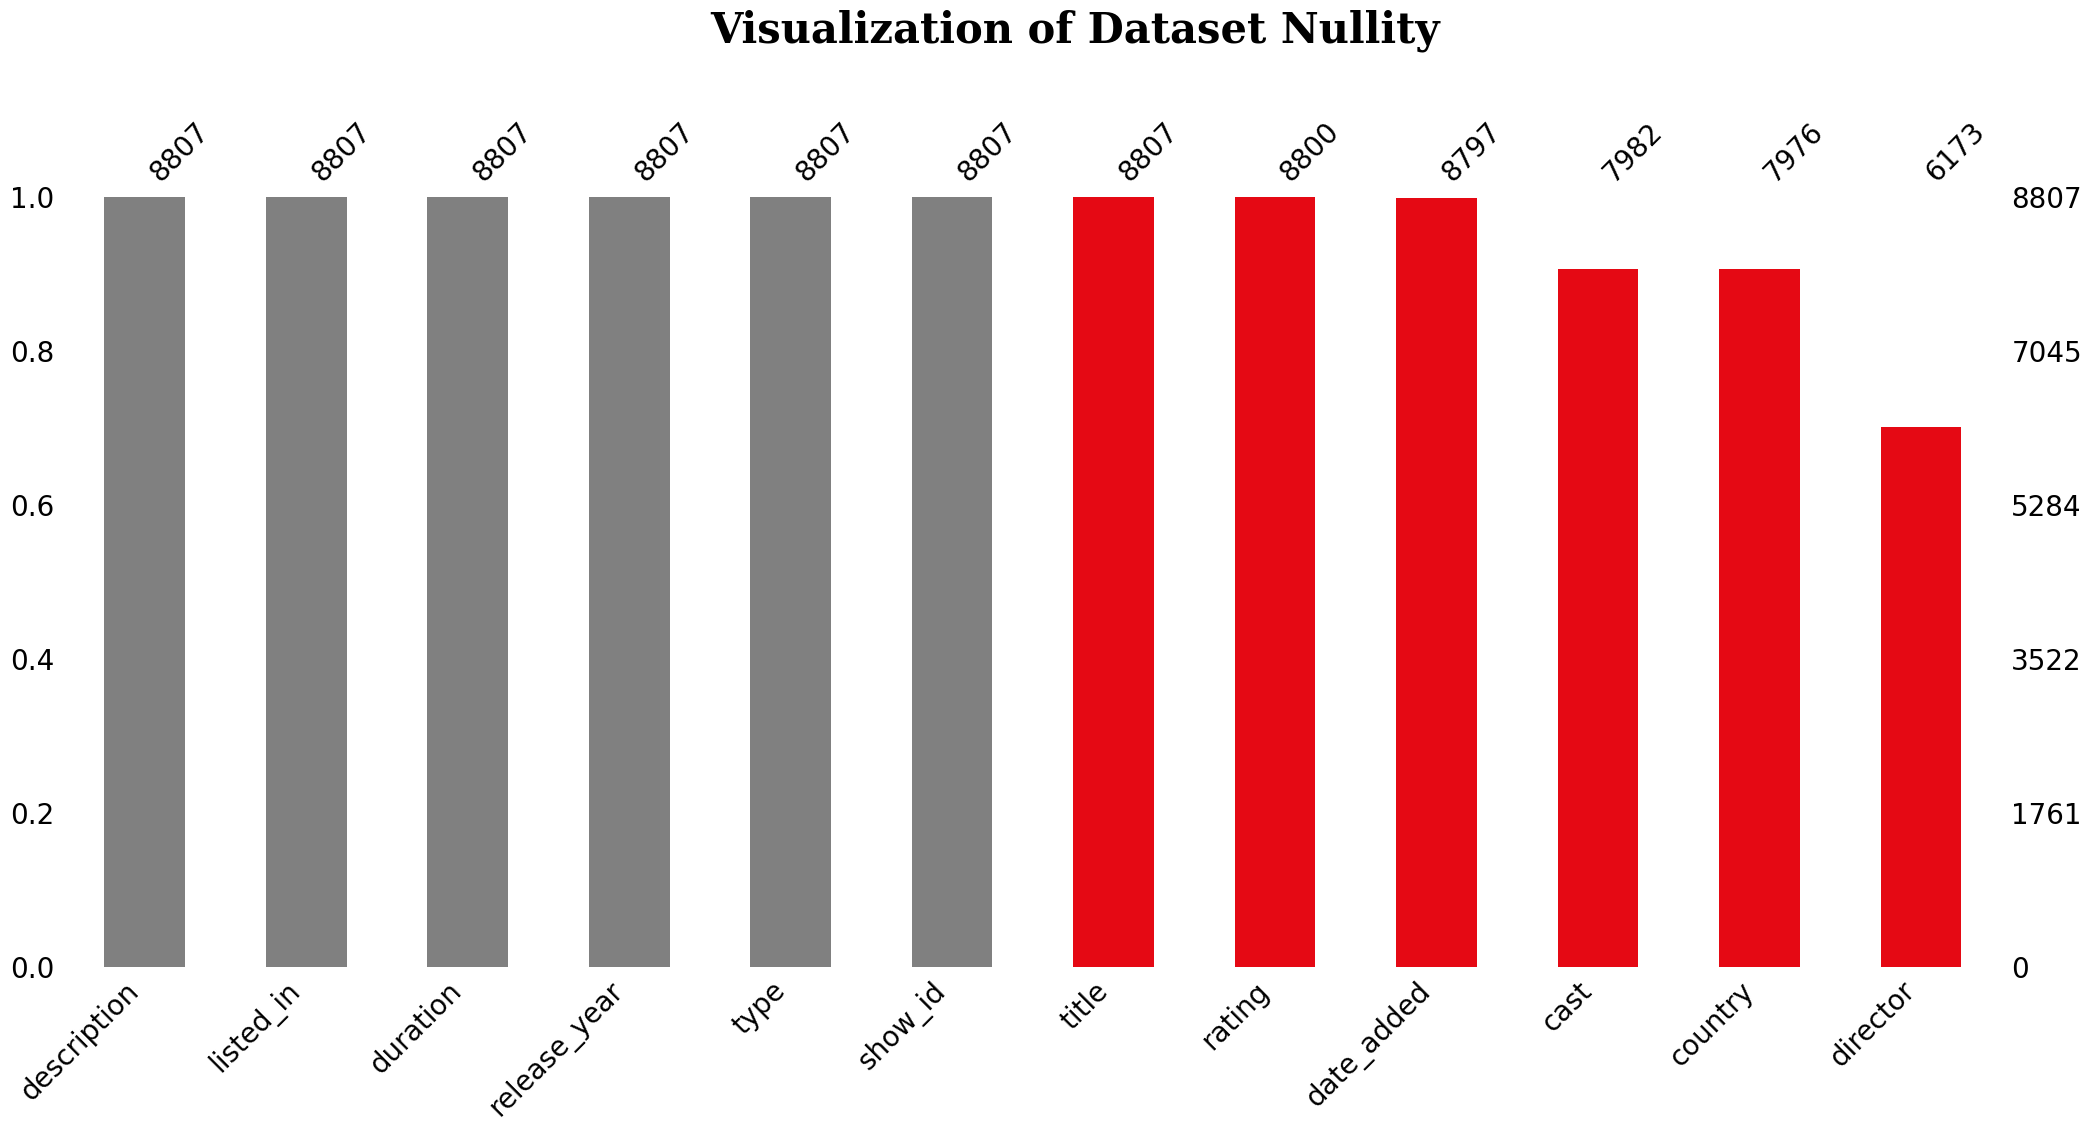

In [15]:
# missing value visualisation
color = ['grey','grey','grey','grey','grey','grey','#E50914','#E50914','#E50914','#E50914','#E50914','#E50914']
ax = msno.bar(df,sort = 'descending',color = color,fontsize = 20)
ax.text(3.5,1.2,'Visualization of Dataset Nullity',{'font':'serif', 'color':'black','weight':'bold','size':30})
plt.show()

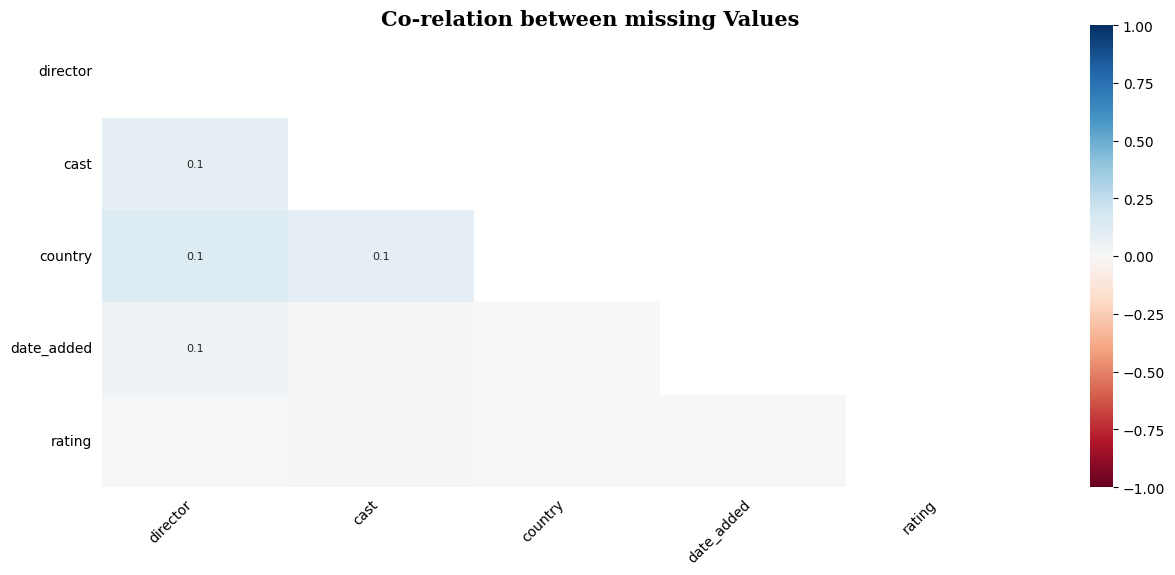

In [16]:
# Correlation between missing Values
ax = msno.heatmap(df,figsize = (15,6),fontsize = 10)
ax.text(1.5,0,'Co-relation between missing Values',{'font':'serif', 'color':'black','weight':'bold','size':15})
plt.show()

### Insights
1. From our above analysis, there are total of `6 columns` containing missing values. `Director's` column has the most missing values followed by `cast` and `country` column. `Date added, ratings and duration` have significantly less missing values (<1%)
2. The heatmap illustrates the correlation of missing data between each pair of columns. `Apart` from strong correlation between rating and duration column, The fact that all other values are `close to 0` indicates that there is `no dependence` between the occurrence of missing values in two variables

### Approach to fill missing values

**1. Director Column** - Filling it with `Unknown Director`

**2. Cast Column** - Filling it with `Unknown Cast`

**3. Country Column** - Filling it with `Unknown Country`

**4. Date Added Column** - Since it had only `10` missing values, details about it were found from Google. Following details were obtained -
- A Young Doctor's Notebook and Other Stories - September 15, 2014
- Anthony Bourdain: Parts Unknown - June 1, 2020
- Frasier - April 1, 2015
- Friends - January 1, 2015
- Gunslinger Girl - January 4, 2016
- Kikoriki - July 6, 2017
- La Familia P. Luche - June 1, 2015
- Maron - November 2, 2018
- Red vs. Blue -  March 21, 2015
- The Adventures of Figaro Pho - January 1, 2016
    

**5. Rating Column** - Since it had only `7` missing values, details about it were found from Google. Following details were obtained -
- 13TH: A Conversation with Oprah Winfrey & Ava ... - TV-PG
- Gargantia on the Verdurous Planet - TV-PG
- Little Lunch - TV-Y
- My Honor Was Loyalty - PG-13
- Louis C.K. 2017 - TV-MA
- Louis C.K.: Hilarious - TV-MA
- Louis C.K.: Live at the Comedy Store - TV-MA


**6. Duration Column** - Since it had only `3` missing values, details about it were found from Google. Following details were obtained -
- Louis C.K. 2017 - 74 min
- Louis C.K.: Hilarious - 83 min
- Louis C.K.: Live at the Comedy Store - 65 min

### Replacing the missing values

In [17]:
df['director'].fillna('Unknown Director',inplace = True)
df['cast'].fillna('Unknown cast',inplace = True)
df['country'].fillna('Unknown country',inplace = True)

date = {"A Young Doctor's Notebook and Other Stories" : 'September 15, 2014',
       "Anthony Bourdain: Parts Unknown" : 'June 1, 2020',
        "Frasier" : 'April 1, 2015',
        "Friends" : 'January 1, 2015',
        "Gunslinger Girl" : 'January 4, 2016',
        "Kikoriki" : 'July 6, 2017',
        "La Familia P. Luche" : 'June 1, 2015',
        "Maron" : 'November 2, 2018',
        "Red vs. Blue" : 'March 21, 2015',
        "The Adventures of Figaro Pho": 'January 1, 2016'}

for i in date :
    df.loc[df['title'] == i, 'date_added'] = date[i]

ratings = {"13TH: A Conversation with Oprah Winfrey & Ava DuVernay" : 'TV-PG',
         "Gargantia on the Verdurous Planet" : 'TV-PG',
          "Little Lunch" : 'TV-Y',
          "My Honor Was Loyalty" : 'PG-13',
          "Louis C.K. 2017" : 'TV-MA',
          "Louis C.K.: Hilarious" : 'TV-MA',
          "Louis C.K.: Live at the Comedy Store":'TV-MA'}

for i in ratings:
    df.loc[df['title'] == i,'rating'] = ratings[i]

durn = {"Louis C.K. 2017" : '74 min',
          "Louis C.K.: Hilarious" : '83 min',
          "Louis C.K.: Live at the Comedy Store":'65 min'}

for i in durn:
    df.loc[df['title'] == i,'duration'] = durn[i]

In [18]:
# check
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


## Adding new columns for better analysis
- We will add 3 columns - **year_added,month_added,week_added** to the df to facilitate further data analysis.

In [19]:
# converting date_added to datetime column
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'],format='%B %d, %Y')

#adding new columns
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
df['week_added'] = df['date_added'].dt.isocalendar().week

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,38
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,38
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,38


## Un-nesting the columns for better analysis

- We will create a **new df** which has un-nested director,cast and country columns into multiple rows which will help while doing analysis related to them.

In [20]:
# creating a separate table
df1 = copy.deepcopy(df)


df1["director"] = df["director"].str.split(", ")
df1["cast"] = df["cast"].str.split(", ")
df1["country"] = df["country"].str.split(", ")

df1 = df1.explode(['director'])
df1 = df1.explode(['cast'])
df1 = df1.explode(['country'])
df1.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,38
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,38
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,38


In [21]:
#checking shape of new df
df1.shape

(89382, 15)

# Data Visualisation

## Content Distribution    

In [22]:
x = df['type'].value_counts()
x

,count
type,
Movie,6131
TV Show,2676


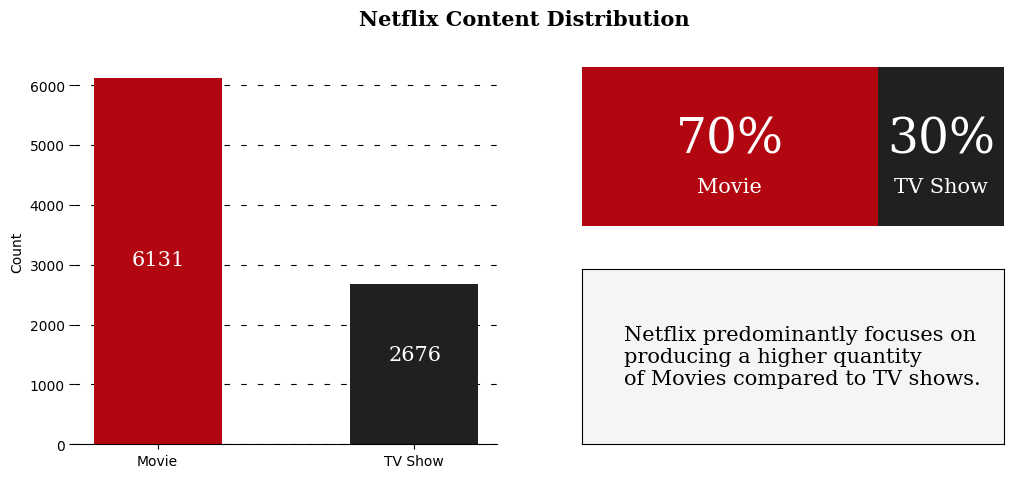

In [23]:
#setting the plot style
fig = plt.figure(figsize = (12,5))
gs = fig.add_gridspec(2,2)

# creating graph for count of movies
ax0 = fig.add_subplot(gs[:,0])
ax0.bar(x.index,x.values,color =['#b20710','#221f1f'],zorder = 2,width = 0.5)
ax0.set(ylabel = 'Count')

# adding value_count label
ax0.text(-0.1,3000,x.values[0],fontsize=15, fontweight='light', fontfamily='serif',color='white')
ax0.text(0.9,1400,x.values[1],fontsize=15, fontweight='light', fontfamily='serif',color='white')
ax0.grid(color='black', linestyle='--', axis='y', zorder=0,  dashes=(5,10))


#removing the axis lines
for s in ['top', 'left', 'right']:
    ax0.spines[s].set_visible(False)

# creating the visual for percentage distribution
ax1 = fig.add_subplot(gs[0,1])
ax1.barh(x.index[0],0.7,color = '#b20710')
ax1.barh(x.index[0],0.3,left = 0.7,color = '#221f1f')
ax1.set(xlim = (0,1))

#removing the axis info
ax1.set_xticks([])
ax1.set_yticks([])

# adding graph info
ax1.text(0.35,0.04,'70%',va = 'center', ha='center',fontsize=35, fontweight='light', fontfamily='serif',color='white')
ax1.text(0.35,-0.2,'Movie',va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',color='white')
ax1.text(0.85,0.04,'30%',va = 'center', ha='center',fontsize=35, fontweight='light', fontfamily='serif',color='white')
ax1.text(0.85,-0.2,'TV Show',va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',color='white')

#removing the axis lines
for s in ['top', 'left', 'right', 'bottom']:
    ax1.spines[s].set_visible(False)

# adding text insight
ax2 = fig.add_subplot(gs[1,1])
ax2.set_facecolor('#f6f5f5')
ax2.set_xticks([])
ax2.set_yticks([])

ax2.text(0.1,0.5,'Netflix predominantly focuses on\nproducing a higher quantity\nof Movies compared to TV shows.',
         va = 'center', ha='left',fontsize=15, fontweight='light', fontfamily='serif',color='black')

#adding title to the visual
fig.suptitle('Netflix Content Distribution',fontproperties = {'family':'serif', 'size':15,'weight':'bold'})

plt.show()


## Evolution of Netflix's Growing Library of Movies & TV Shows

- **Analysis of number of Movies and TV shows added over time on Netflix**

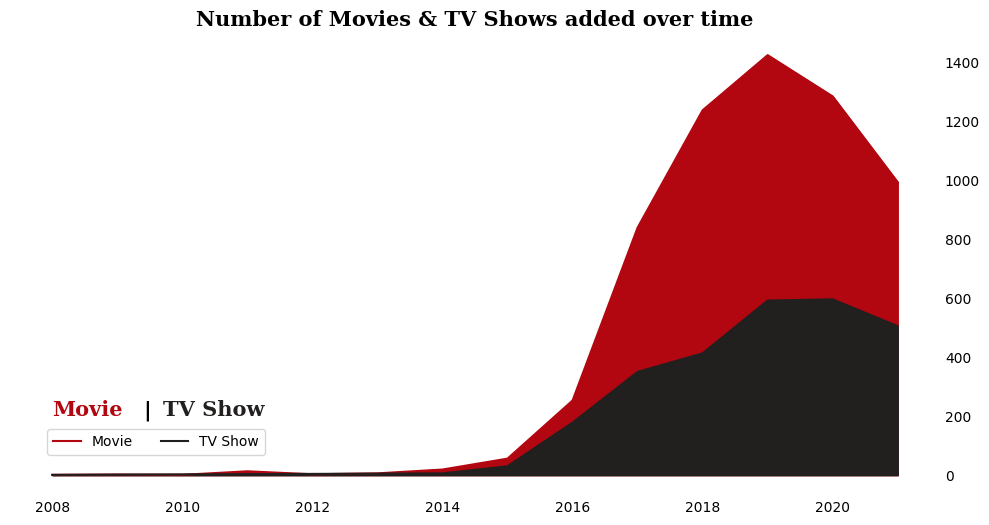

In [24]:
#setting the plot style
fig,ax = plt.subplots(figsize = (12,6))
color = ['#b20710','#221f1f']

#plotting the visual
for i,type_ in  enumerate(df['type'].unique()):
    temp_df = df.loc[df['type'] == type_,'year_added'].value_counts().sort_index()
    ax.plot(temp_df.index,temp_df.values,color = color[i],label = type_)
    ax.fill_between(temp_df.index,0,temp_df.values,color = color[i])

#changing the y-axis position from left to right
ax.yaxis.tick_right()

#removing the axis lines
for s in ['top','left','bottom','right']:
    ax.spines[s].set_visible(False)

#removing tick marks but keeping the labels
ax.tick_params(axis = 'both',length = 0)

#adding title to the visual
ax.set_title('Number of Movies & TV Shows added over time',
            {'font':'serif', 'size':15,'weight':'bold'})


#adding custom legend
ax.text(2008,200,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
ax.text(2009.4,200,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
ax.text(2009.7,200,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')
plt.legend(loc = (0.04,0.09),ncol = 2)


plt.show()

### Insights

- We see a slow start for Netflix over several years. **Things begin to pick up in 2015 and then there is a rapid increase from 2016**.


- As we saw in the timeline at the start of this analysis, **Netflix went global in 2016 - and it is extremely noticeable in this plot.**


- The rate of content additions decelerated in 2020, possibly attributed to the **impact of the COVID-19 pandemic**.

## Directors with the Most Appearances

- **`Top 10 directors`** who have appeared in most movies or TV shows.

In [25]:
d_cnt = df1.groupby('director')['title'].nunique().sort_values(ascending  = False)[0:11].reset_index()
d_cnt

,director,title
0,Unknown Director,2634
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Marcus Raboy,16
5,Suhas Kadav,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Youssef Chahine,12
9,Jay Chapman,12


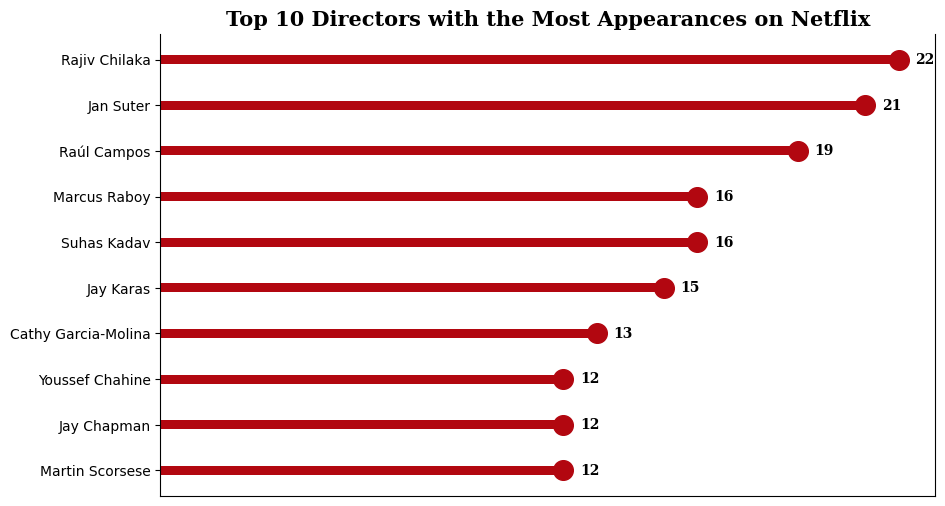

In [26]:
# droping unknown director and reversing the df
d_cnt = d_cnt.iloc[-1:-11:-1]

#setting the plot style
fig,ax = plt.subplots(figsize = (10,6))

#creating the plot
ax.barh(y = d_cnt['director'],width = d_cnt['title'],height = 0.2,color = '#b20710')
ax.scatter(y = d_cnt['director'], x = d_cnt['title'] , s = 200 , color = '#b20710' )

#removing x-axis
ax.set_xticks([])

#adding label to each bar
for y,x in zip(d_cnt['director'],d_cnt['title']):
    ax.text( x + 0.5 , y , x,{'font':'serif', 'size':10,'weight':'bold'},va='center')

#removing the axis lines
for s in ['top','bottom','right']:
    ax.spines[s].set_visible(False)

    #creating the title
    ax.set_title('Top 10 Directors with the Most Appearances on Netflix',
                {'font':'serif', 'size':15,'weight':'bold'})

    plt.show()

## Actor's with the Most Appearances

- **`Top 10 Actor's`** who have appeared in most movies or TV shows.

In [27]:
a_cnt = df1.groupby('cast')['title'].nunique().sort_values(ascending  = False)[0:11].reset_index()

a_cnt

,cast,title
0,Unknown cast,825
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Takahiro Sakurai,32
5,Naseeruddin Shah,32
6,Rupa Bhimani,31
7,Akshay Kumar,30
8,Om Puri,30
9,Yuki Kaji,29


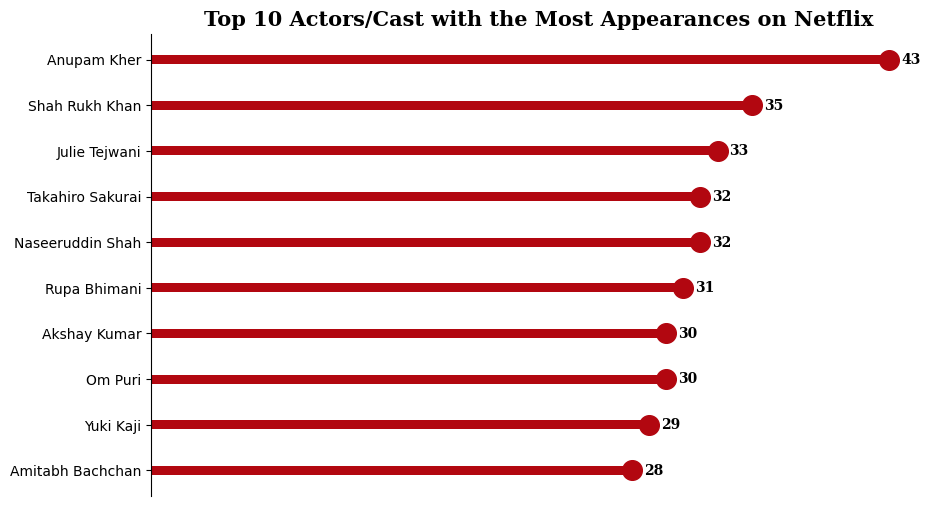

In [28]:
# droping unknown actor and reversing the list
a_cnt = a_cnt.iloc[-1:-11:-1]

#setting the plot style
fig,ax = plt.subplots(figsize = (10,6))

#creating the plot
ax.barh(y = a_cnt['cast'],width = a_cnt['title'],height = 0.2,color = '#b20710')
ax.scatter(y = a_cnt['cast'], x = a_cnt['title'] , s = 200 , color = '#b20710' )

#removing x-axis
ax.set_xticks([])

#adding label to each bar
for y,x in zip(a_cnt['cast'],a_cnt['title']):
    ax.text( x + 0.7 , y , x,{'font':'serif', 'size':10,'weight':'bold'},va='center')

#removing the axis lines
for s in ['top','bottom','right']:
    ax.spines[s].set_visible(False)

#creating the title
ax.set_title('Top 10 Actors/Cast with the Most Appearances on Netflix',
            {'font':'serif', 'size':15,'weight':'bold'})

plt.show()

### Insights

- Significantly, `8 out of the top 10` Actors/Cast with the highest number of appearances on Netflix are of `Indian origin`.

## Global Streaming Sensations

- **`Top 10 Countries`** which have produced the **`most Movies`** and **`most TV Shows`**  on Netflix.

In [29]:
#creating df for top 10 movies producing countries
df_movie = df1[df1['type'] == 'Movie']
df_movie = df_movie.groupby('country')['title'].nunique().sort_values(ascending = False).reset_index().loc[0:10]

#dropping unknown country column
df_movie = df_movie.drop(3)

#replacing country names in shortformat
df_movie['country'] = df_movie['country'].replace({'United States':'USA','United Kingdom':'UK','South Korea':'S korea'})
df_movie

,country,title
0,USA,2751
1,India,962
2,UK,532
4,Canada,319
5,France,303
6,Germany,182
7,Spain,171
8,Japan,119
9,China,114
10,Mexico,111


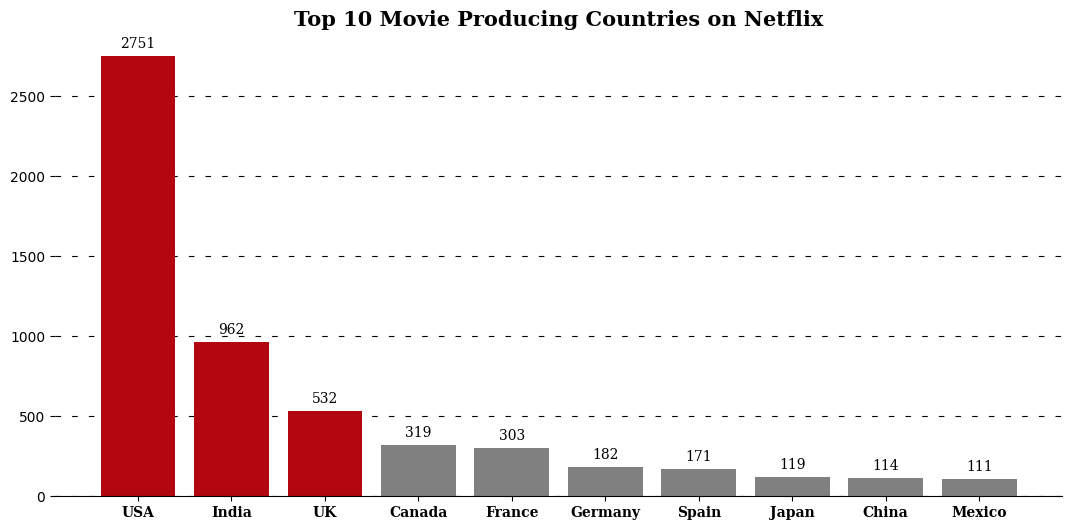

In [30]:
#setting the plot style
fig,ax = plt.subplots(figsize = (13,6))

color_map = ['grey' for i in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710' # highlight color

#creating the plot
ax.bar(df_movie['country'],df_movie['title'],color = color_map,zorder = 2)

#adding valuecounts
for i in df_movie.index:
    ax.text(df_movie.loc[i,'country'],df_movie.loc[i,'title'] + 75, df_movie.loc[i,'title'],
           {'font':'serif', 'size':10},ha = 'center',va = 'center')

#setting grid style
ax.grid(color = 'black',linestyle = '--',axis = 'y',zorder = 0,dashes = (5,10))

#customizing the x-axis labels
ax.set_xticklabels(df_movie['country'],fontweight = 'bold',fontfamily='serif')

#removing the axis lines

for s in ['top','left','right']:
    ax.spines[s].set_visible(False)

#adding title to the visual
ax.set_title('Top 10 Movie Producing Countries on Netflix',
            {'font':'serif', 'size':15,'weight':'bold'})

plt.show()

In [31]:
#creating df for top 10 tv shows producing countries
df_tv = df1[df1['type'] == 'TV Show']
df_tv = df_tv.groupby('country')['title'].nunique().sort_values(ascending = False).reset_index().loc[0:10]

#dropping unknown country column
df_tv = df_tv.drop(1)

#replacing country names in shortformat
df_tv['country'] = df_tv['country'].replace({'United States':'USA','United Kingdom':'UK','South Korea':'S korea'})
df_tv

,country,title
0,USA,938
2,UK,272
3,Japan,199
4,S korea,170
5,Canada,126
6,France,90
7,India,84
8,Taiwan,70
9,Australia,66
10,Spain,61


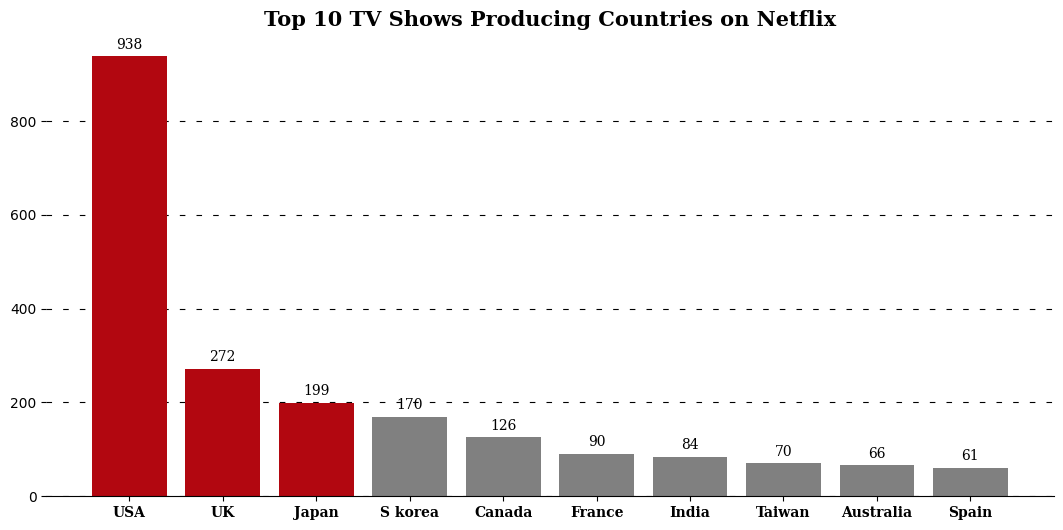

In [32]:
#setting the plot style
fig,ax = plt.subplots(figsize = (13,6))

color_map = ['grey' for i in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710' # highlight color

#creating the plot
ax.bar(df_tv['country'],df_tv['title'],color = color_map,zorder = 2)

#adding valuecounts
for i in df_tv.index:
    ax.text(df_tv.loc[i,'country'],df_tv.loc[i,'title'] + 25, df_tv.loc[i,'title'],
           {'font':'serif', 'size':10},ha = 'center',va = 'center')

#setting grid style
ax.grid(color = 'black',linestyle = '--',axis = 'y',zorder = 0,dashes = (5,10))

#customizing the x-axis labels
ax.set_xticklabels(df_tv['country'],fontweight = 'bold',fontfamily='serif')

#removing the axis lines

for s in ['top','left','right']:
    ax.spines[s].set_visible(False)

#adding title to the visual
ax.set_title('Top 10 TV Shows Producing Countries on Netflix',
            {'font':'serif', 'size':15,'weight':'bold'})

plt.show()

### Insights

**1. Content Investment Strategy**
- Netflix heavily invests in content production in the USA, its home country, to attract and retain subscribers.  India, being the second on the list, signifies Netflix's strategic focus on the Indian market due to its significant population and growing demand for streaming services.

**2. Global Expansion**
- The presence of shows from various countries, such as UK, Canada, France, Japan,etc. highlights Netflix's effort to cater to a diverse global audience.This also enables Netflix to provide content that resonates with the cultural and linguistic preferences of different regions.

**3. TV Shows Vs Movies**
- Indian's prefer to watch movies over TV shows, on contrary South koreans perfer Tv shows over movies.

## Content Split

- **`Content split`** for **`Top 10 Countries`** which have produced the **`most Movies`** and **`most TV Shows`**  on Netflix.

In [33]:
#creating a df for top 10 countries based on overall content count
c_cnt = df1.groupby('country')['title'].nunique().sort_values(ascending  = False).reset_index().loc[0:10]

c_cnt = c_cnt.drop(2) #dropping unknown country column

#renaming the countries
c_cnt['country'] = c_cnt['country'].replace({'United States':'USA','United Kingdom':'UK','South Korea':'S korea'})
c_cnt

,country,title
0,USA,3689
1,India,1046
3,UK,804
4,Canada,445
5,France,393
6,Japan,318
7,Spain,232
8,S korea,231
9,Germany,226
10,Mexico,169


In [34]:
#creating a df to calculate split between tv-show and movies
df_merge = pd.merge(c_cnt,df_movie, on = 'country', how = 'left')
df_merge = pd.merge(df_merge,df_tv, on = 'country',how = 'left')

#renaming the columns
df_merge.rename(columns = {'title_x':'Total_Count','title_y':'Movie_Count','title':'TV_Show_Count'},inplace = True)

#filling the uncaptured information
df_merge['Movie_Count'].fillna(df_merge['Total_Count']-df_merge['TV_Show_Count'],inplace = True)
df_merge['TV_Show_Count'].fillna(df_merge['Total_Count']-df_merge['Movie_Count'],inplace = True)

#calculating the %split between movies and tv-shows
df_merge['Movie%'] = round((df_merge['Movie_Count']/df_merge['Total_Count'])*100)
df_merge['TV%'] = round((df_merge['TV_Show_Count']/df_merge['Total_Count'])*100)

#changing the data-type of columns to int
for i in df_merge.columns[1:]:
    df_merge[i] = df_merge[i].astype('int')

#sorting the df
df_merge = df_merge.sort_values(by= 'Movie%')
df_merge

,country,Total_Count,Movie_Count,TV_Show_Count,Movie%,TV%
7,S korea,231,61,170,26,74
5,Japan,318,119,199,37,63
2,UK,804,532,272,66,34
9,Mexico,169,111,58,66,34
3,Canada,445,319,126,72,28
6,Spain,232,171,61,74,26
0,USA,3689,2751,938,75,25
4,France,393,303,90,77,23
8,Germany,226,182,44,81,19
1,India,1046,962,84,92,8


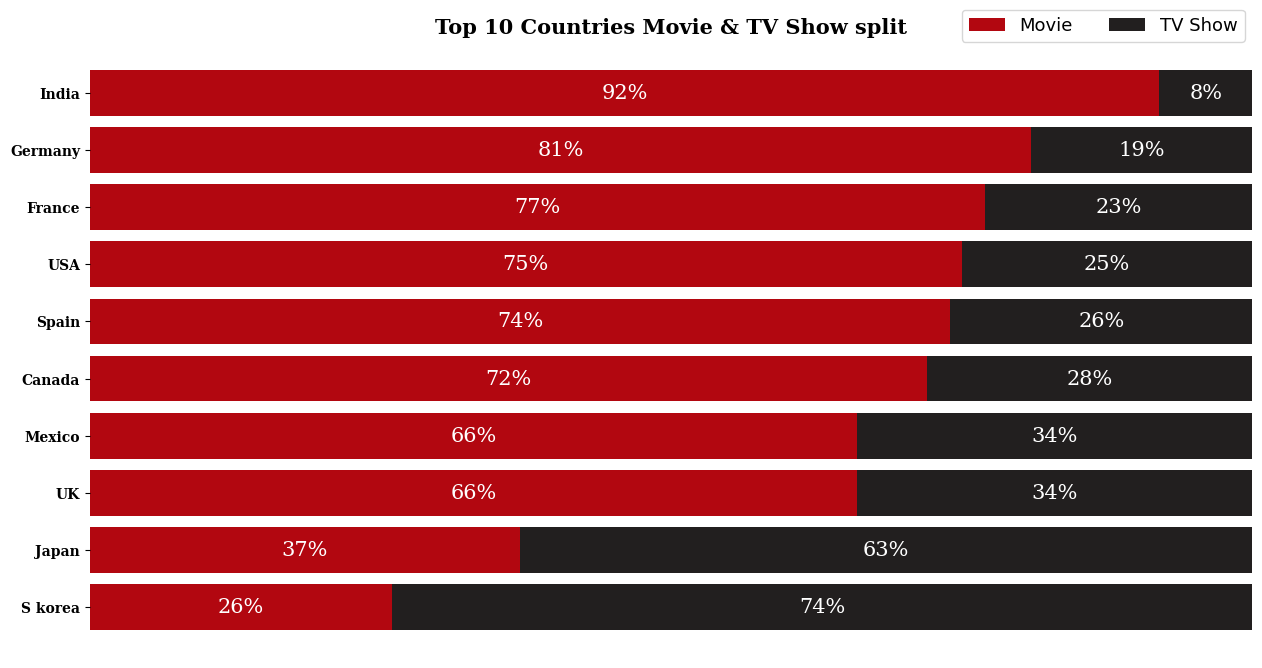

In [35]:
#setting the plot style
fig,ax = plt.subplots(figsize = (15,8))

#plotting the visual
ax.barh(df_merge['country'],width = df_merge['Movie%'],color = '#b20710')
ax.barh(df_merge['country'],width = df_merge['TV%'],left = df_merge['Movie%'],color ='#221f1f')
ax.set(xlim=(0,100))

#customizing ticks
ax.set_xticks([])
ax.set_yticklabels(df_merge['country'],fontweight = 'bold',fontfamily='serif')

#adding % values in the bars

for i in df_merge.index:
    ax.text((df_merge.loc[i,'Movie%'])/2,df_merge.loc[i,'country'],f"{df_merge.loc[i,'Movie%']}%",
            va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',color='white')

    ax.text((df_merge.loc[i,'Movie%'] + (df_merge.loc[i,'TV%']/2)),df_merge.loc[i,'country'],f"{df_merge.loc[i,'TV%']}%",
            va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',color='white')

#removing the axis lines

for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)

#adding title to the visual
ax.set_title('Top 10 Countries Movie & TV Show split',
            {'font':'serif', 'size':15,'weight':'bold'})

#adding legend
ax.legend(['Movie','TV Show'],loc = (0.75,1),ncol = 2,fontsize = 13)

plt.show()

### Insights

**Content Preferences**

- **TV shows are more popular** than movies in **`Asian countries`**, especially South Korea and Japan, where they account for **`more than 60%`** of the content.


- **Movies are more popular** than TV shows in **`European countries`**,where they account for **`more than 65%`** of the content.


- **`India`** has the **highest percentage of movies (92%)** among all the countries, which may indicate a high demand for movies.


- **`North American countries`** have **similar** movie percentages (around 70%) and similar TV show percentages (around 30%) as each other,suggesting a similar preference or taste among these markets.

## Best Month to launch a TV show/Movie?

In [36]:
month = df.groupby('month_added')['type'].value_counts()
month.name = 'count' # to avoid error while doing reset_index
month = month.reset_index()

#converting month_added to categorical type to help in future sorting steps
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month['month_added'] = pd.Categorical(month['month_added'], categories=months, ordered=True)

month.head()

,month_added,type,count
0,April,Movie,550
1,April,TV Show,215
2,August,Movie,519
3,August,TV Show,236
4,December,Movie,547


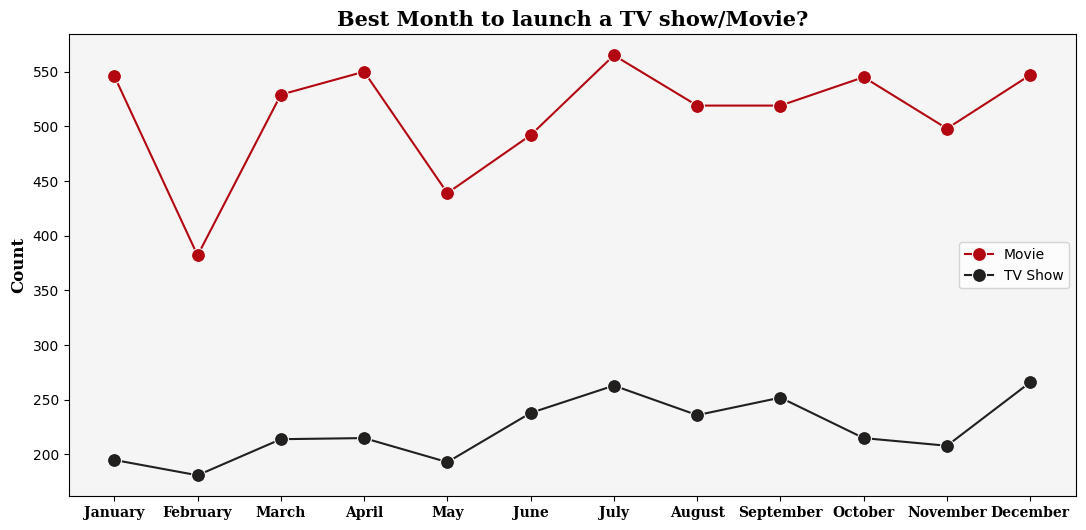

In [37]:
# creating two different tables for movies and tv shows
month_movie = month.loc[month['type'] == 'Movie'].sort_values(by = 'month_added')
month_tv = month.loc[month['type'] == 'TV Show'].sort_values(by = 'month_added')

#setting the plot style
fig,ax = plt.subplots(figsize = (13,6))
ax.set_facecolor('#f6f5f5')

#creating the plot
sns.lineplot(data = month_movie, x = 'month_added', y = 'count',marker = 'o',markersize = 10,color ='#b20710',
             label = 'Movie',ax = ax)
sns.lineplot(data = month_tv, x = 'month_added', y = 'count',marker = 'o',markersize = 10,color ='#221f1f',
             label = 'TV Show', ax = ax)

#customizing the axis ticks
ax.set_xticklabels(month_movie['month_added'],fontweight = 'bold',fontfamily='serif')

#customizing axis label
plt.xlabel(None)
plt.ylabel('Count',fontweight = 'bold',fontfamily='serif',fontsize = 12)

#customizing legend
plt.legend(loc = 'center right')

#creating the title
ax.set_title('Best Month to launch a TV show/Movie?',
            {'font':'serif', 'size':15,'weight':'bold'})

plt.show()

### Insights

**1. Consistent Patterns**
- The monthly upload count of both Movies and TV shows exhibits a remarkably `similar trend.`

**2. Seasonal Fluctuations**
- There is a notable correlation between **content uploads and holiday seasons**, with **January and December** witnessing significant spikes in content additions.
- The months of **July, August, October, and December** record **higher content** upload counts, whereas **February, May, and November** experience comparatively **lower counts**.
- They may choose to focus on certain months or seasons to release high content and schedule fewer releases based on **information about historical viewer preferences and behavior**.

## Best Week to launch a TV show/Movie?

In [38]:
week = df.groupby('week_added')['type'].value_counts()
week.name = 'count' # to avoid error while doing reset_index
week = week.reset_index()
week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   week_added  106 non-null    UInt32
 1   type        106 non-null    object
 2   count       106 non-null    int64 
dtypes: UInt32(1), int64(1), object(1)
memory usage: 2.3+ KB


In [39]:
#changing the week_added datatype to int

week['week_added'] = week['week_added'].astype('int64')

week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   week_added  106 non-null    int64 
 1   type        106 non-null    object
 2   count       106 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


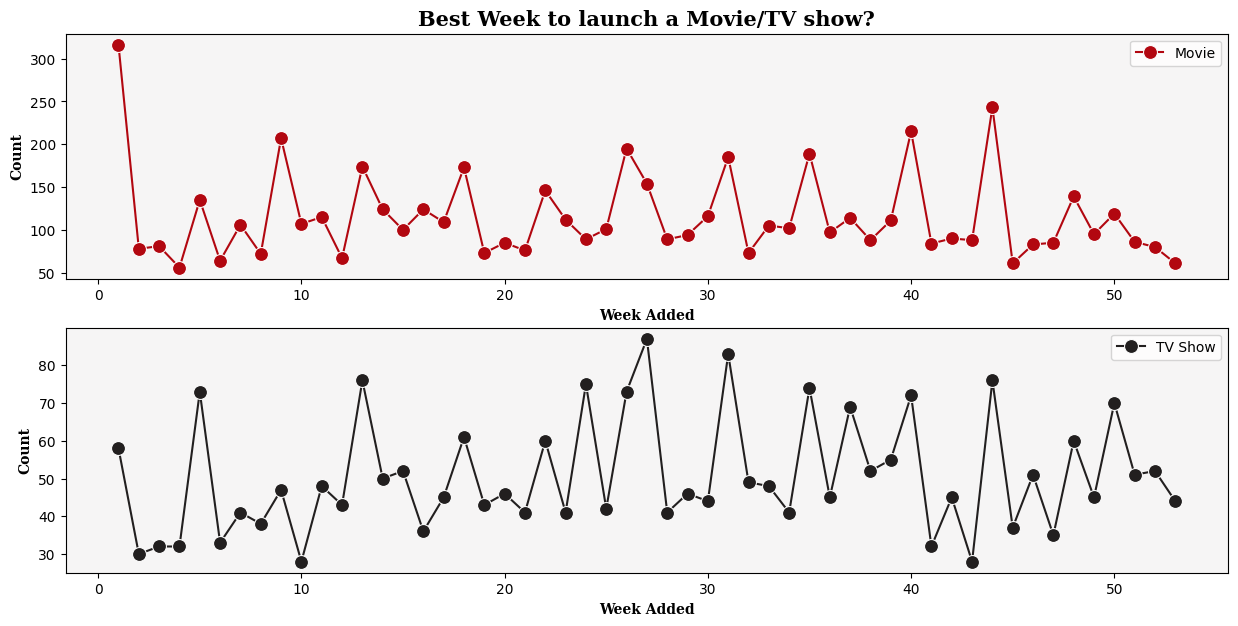

In [40]:
# creating two different tables for movies and tv shows
week_movie = week.loc[week['type'] == 'Movie'].sort_values(by = 'week_added')
week_tv = week.loc[week['type'] == 'TV Show'].sort_values(by = 'week_added')

#setting the plot style
fig = plt.figure(figsize = (15,7))
gs = fig.add_gridspec(2,1)

# creating graph for count of movies
ax0 = fig.add_subplot(gs[0,:])
ax0.set_facecolor('#f6f5f5')
sns.lineplot(data = week_movie, x = 'week_added', y = 'count',marker = 'o',markersize = 10,color ='#b20710',
             label = 'Movie',ax = ax0)

#customizing axis labels
ax0.set_xlabel('Week Added',fontweight = 'bold',fontfamily='serif')
ax0.set_ylabel('Count',fontweight = 'bold',fontfamily='serif')


# creating graph for count of tv shows
ax1 = fig.add_subplot(gs[1,:])
ax1.set_facecolor('#f6f5f5')
sns.lineplot(data = week_tv, x = 'week_added', y = 'count',marker = 'o',markersize = 10,color ='#221f1f',
             label = 'TV Show', ax = ax1)

#customizing axis labels
ax1.set_xlabel('Week Added',fontweight = 'bold',fontfamily='serif')
ax1.set_ylabel('Count',fontweight = 'bold',fontfamily='serif')

#creating the title
ax0.set_title('Best Week to launch a Movie/TV show?',
            {'font':'serif', 'size':15,'weight':'bold'})


plt.show()


### Insights

**1. Consistent Patterns**
- The weekly upload count of both Movies and TV shows exhibits a remarkably `similar trend` with respect to spikes and dips.


- A unique pattern can be observed in terms of spikes and dips. **During a specific week, there is a noticeable increase in content uploads, followed by a three-week period of reduced content addition.** This pattern might indicate a **monthly cycle** wherein the majority of content is uploaded during the first week and the initial week of the subsequent month.


- The **highest volume of movies** are typically uploaded during the **initial week** of the year.


- The **highest volume of TV shows** tends to be added in the **26th week** (around June end)

##  Exploring Netflix Content Ratings

- **`Rating distribution`** for `Movies` and `TV shows` on Netflix

In [41]:
#creating the relevant df
movie_rating = df.loc[df['type'] == 'Movie','rating'].value_counts().reset_index()
tv_rating = df.loc[df['type'] == 'TV Show','rating'].value_counts().reset_index()


movie_rating


,rating,count
0,TV-MA,2065
1,TV-14,1427
2,R,797
3,TV-PG,541
4,PG-13,491
5,PG,287
6,TV-Y7,139
7,TV-Y,131
8,TV-G,126
9,NR,75


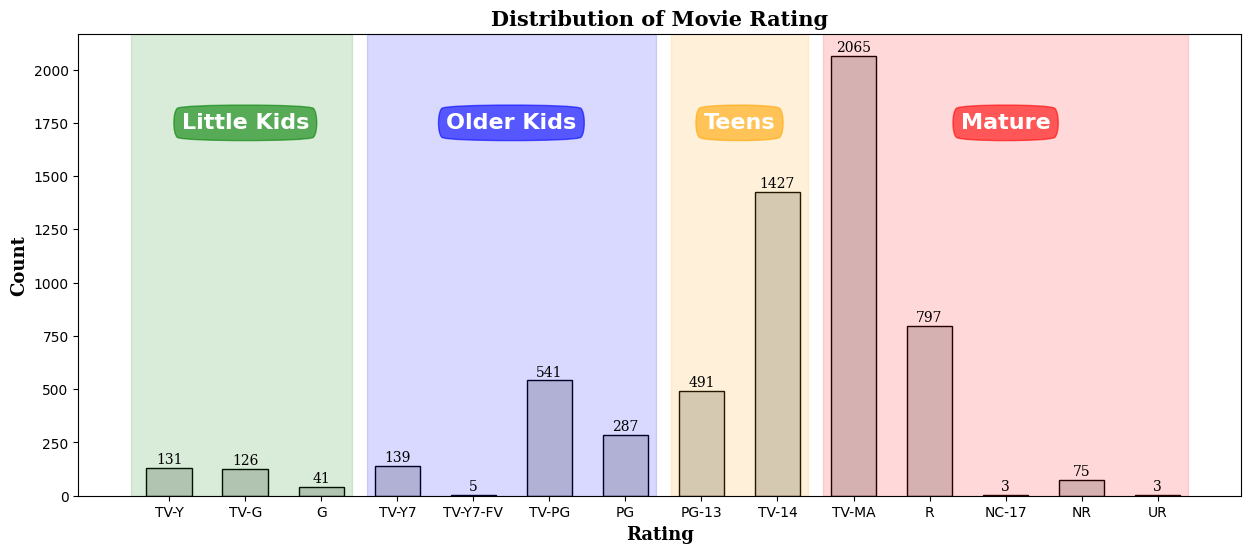

In [42]:
#setting plot style
fig,ax = plt.subplots(figsize = (15,6))

#plotting the visual
rating_order = ['TV-Y', 'TV-G', 'G','TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG', 'PG-13','TV-14','TV-MA', 'R', 'NC-17', 'NR', 'UR']

for i in rating_order :
    ax.bar(i,movie_rating.loc[movie_rating['rating'] == i,'count'],color = '#d0d0d0',edgecolor='black',width = 0.6)

#setting labels
ax.set_xlabel('Rating',fontweight = 'bold',fontfamily='serif',fontsize = 13)
ax.set_ylabel('Count',fontweight = 'bold',fontfamily='serif',fontsize = 13)

#adding column values
for j in rating_order:
    ax.text(j,movie_rating.loc[movie_rating['rating'] == j,'count'].iloc[0] + 40,
            movie_rating.loc[movie_rating['rating'] == j,'count'].iloc[0],
            {'font':'serif', 'size':10},ha = 'center',va = 'center')

#setting color patches and putting text boxes in them

color =  ['green',  'blue',  'orange',  'red']
span_range1 = [[-0.5,2.4], [2.6,6.4], [6.6,8.4], [8.6,13.4]]
span_range2 = [[0, 2], [3,  6], [7, 8], [9, 13]]

for idx, title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):

    ax.axvspan(span_range1[idx][0],span_range1[idx][1],color = color[idx],alpha = 0.15)

    ax.annotate(title,
                xy=(sum(span_range2[idx])/2 ,1750),
                va="center", ha="center",
                color="w", fontsize=16, fontweight='bold',
                bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))

#adding title to visual
ax.set_title('Distribution of Movie Rating',
            {'font':'serif', 'size':15,'weight':'bold'})

plt.show()

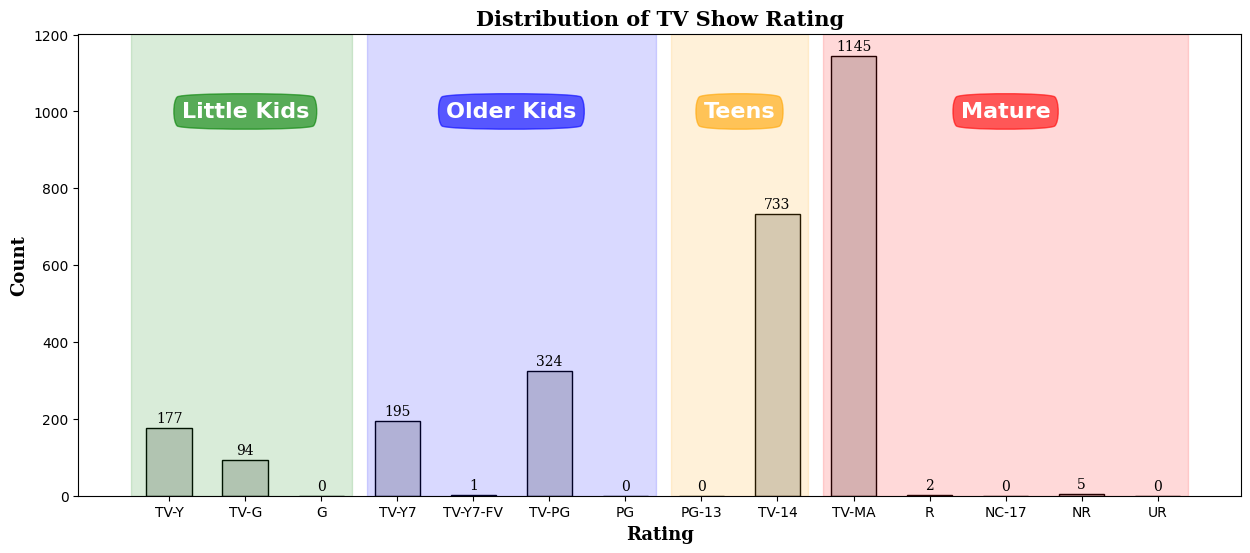

In [43]:
#defining function for rating's that are not present in df
def ifrating(r):
    try:
        cnt = tv_rating.loc[tv_rating['rating'] == r,'count'].iloc[0]
        return cnt
    except :
        return 0

#setting plot style
fig,ax = plt.subplots(figsize = (15,6))

#plotting the visual
rating_order = ['TV-Y', 'TV-G', 'G','TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG', 'PG-13','TV-14','TV-MA', 'R', 'NC-17', 'NR', 'UR']

for i in rating_order :
    ax.bar(i,ifrating(i),color = '#d0d0d0',edgecolor='black',width = 0.6)

#setting labels
ax.set_xlabel('Rating',fontweight = 'bold',fontfamily='serif',fontsize = 13)
ax.set_ylabel('Count',fontweight = 'bold',fontfamily='serif',fontsize = 13)

#adding column values
for j in rating_order:
    ax.text(j,ifrating(j) + 25,
            ifrating(j),
            {'font':'serif', 'size':10},ha = 'center',va = 'center')

#setting patches and putting text boxes in them

color =  ['green',  'blue',  'orange',  'red']
span_range1 = [[-0.5,2.4], [2.6,6.4], [6.6,8.4], [8.6,13.4]]
span_range2 = [[0, 2], [3,  6], [7, 8], [9, 13]]

for idx, title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):

    ax.axvspan(span_range1[idx][0],span_range1[idx][1],color = color[idx],alpha = 0.15)

    ax.annotate(title,
                xy=(sum(span_range2[idx])/2 ,1000),
                va="center", ha="center",
                color="w", fontsize=16, fontweight='bold',
                bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))

#adding title to visual
ax.set_title('Distribution of TV Show Rating',
            {'font':'serif', 'size':15,'weight':'bold'})

plt.show()

### Insights

- The majority of the movies and TV shows available on Netflix cater to adult audiences, followed by teenagers, older children, and then younger children.


- The distribution of content across different age groups on Netflix reflects a strategic approach to catering to a diverse audience and the focus on Adult and teens indicates the focus of Netflix on significant purchasing power of this age group

## Target Audience

- **`Target Audience distribution`** for Movies and TV shows on Netflix

In [44]:
#function for binning age groups
def age_group(x):
    if x in ['TV-Y', 'TV-G', 'G']:
        return 'Little Kids'
    elif x in ['TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG']:
        return 'Older Kids'
    elif x in ['PG-13','TV-14']:
        return 'Teens'
    else:
        return 'Adults'

#creating a df for binning the age groups
#binning ratings into age groups for movies
movie_rating['age'] = movie_rating['rating'].apply(lambda x:age_group(x))
age_m_rating = movie_rating.groupby('age')['count'].sum().sort_values(ascending = False).reset_index()
age_m_rating = age_m_rating.rename(columns={'count': 'rating'})
age_m_rating

# #binning ratings into age groups for tv shows
# tv_rating['age'] = tv_rating['rating'].apply(lambda x:age_group(x))
# age_t_rating = tv_rating.groupby('age')['count'].sum().sort_values(ascending = False).reset_index()
# age_t_rating = age_m_rating.rename(columns={'count': 'rating'})


,age,rating
0,Adults,2943
1,Teens,1918
2,Older Kids,972
3,Little Kids,298


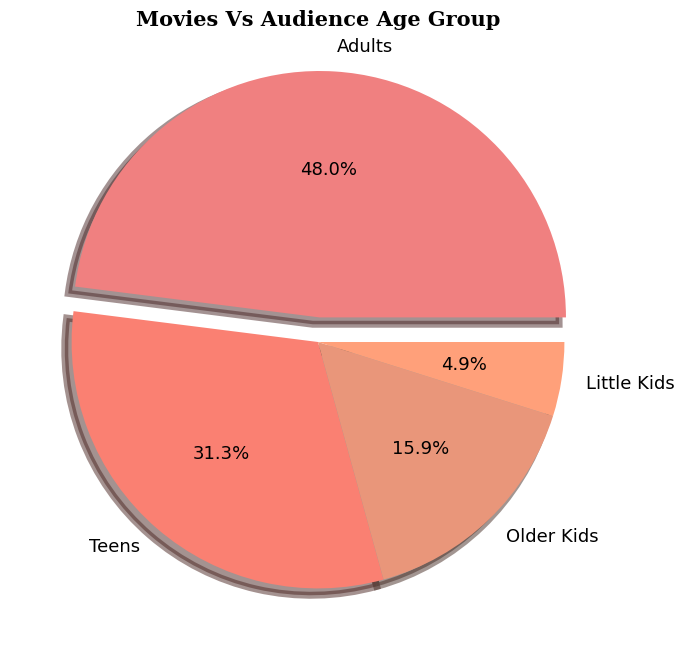

In [45]:
#setting the plot style
fig = plt.figure(figsize = (15,8))
gs = fig.add_gridspec(1,1)

# creating pie chart for movies
ax0 = fig.add_subplot(gs[0,0])

color_map = ['LightCoral','Salmon','DarkSalmon','LightSalmon']
ax0.pie(age_m_rating['rating'],labels = age_m_rating['age'],autopct = '%.1f%%',shadow = True,colors = color_map,
        explode = [0.1,0,0,0],wedgeprops = {'linewidth': 5},textprops={'fontsize': 13, 'color': 'black'})

#setting title for visual
ax0.set_title('Movies Vs Audience Age Group',
            {'font':'serif', 'size':15,'weight':'bold'})

plt.show()

### Insights

**1. Movies**

- Roughly half of the films available on the platform cater to adult audiences, while around 30% of the overall content is designed for teenagers, and the remaining 20% is tailored for children

**2. TV Shows**

- The pattern holds true for television shows as well. The only distinction is that 30% of the content is targeted towards children, which signifies the inclusion of anime shows within Netflix's offerings.

## Netfilx Age Demographics Across Geographies

- **`Age Group Distribution Across Countries`** for Movies and TV shows on Netflix

In [46]:
#function for binning age groups
def age_group(x):
    if x in ['TV-Y', 'TV-G', 'G']:
        return 'Little Kids'
    elif x in ['TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG']:
        return 'Older Kids'
    elif x in ['PG-13','TV-14']:
        return 'Teens'
    else:
        return 'Adults'

#creating a new col for age groups
df1['age_group'] = df1['rating'].apply(lambda x:age_group(x))

#creating a df for top 10 countries based on overall content count
c_cnt = df1.groupby('country')['title'].nunique().sort_values(ascending  = False).reset_index().loc[0:10]

c_cnt = c_cnt.drop(2) #dropping unknown country column

#creating a new df for top 1o countries with target age count
df2 = df1[['country','title','age_group']] #taking relevant columns from the df

df2 = df2[df2['country'].isin(c_cnt['country'])] #filtering top 10 count

df2 = df2.drop_duplicates(keep = 'first') #removing the duplicates to get exact count

df2 = df2.groupby(['country','age_group'])['title'].count().reset_index() #creating the df

df2 = df2.sort_values(by =['country','title'],ascending = [False,False]) #sorting the df

df2 = df2.rename({'title':'count'},axis = 1) #renaming the column

#changing the country names to shortform
df2['country'] = df2['country'].replace({'United States':'USA','United Kingdom':'UK','South Korea':'S korea'})

#adding a new percent column to denote the values in percentage
def percent(x):
    x['percent'] = round(x['count'] / x['count'].sum(),2)
    return x
df2 = df2.groupby('country').apply(lambda x:percent(x))

df2 = df2.reset_index(drop = True)

df2.head(8)

,country,age_group,count,percent
0,Canada,Adults,192,0.43
1,Canada,Older Kids,108,0.24
2,Canada,Teens,81,0.18
3,Canada,Little Kids,64,0.14
4,France,Adults,227,0.58
5,France,Teens,83,0.21
6,France,Older Kids,54,0.14
7,France,Little Kids,29,0.07


In [47]:
#changing the df shape for making the heatmap
df_heatmap = df2.pivot(index='age_group',columns = 'country',values = 'percent')

#rearranging the df values in decreasing order of overall content count
country_order = ['USA','India','UK','Canada','France','Japan','Spain','S korea','Germany','Mexico']

age_order = ['Little Kids','Older Kids','Teens','Adults']

df_heatmap = df_heatmap.loc[age_order,country_order]

df_heatmap

country,USA,India,UK,Canada,France,Japan,Spain,S korea,Germany,Mexico
age_group,,,,,,,,,,
Little Kids,0.07,0.02,0.08,0.14,0.07,0.02,0.04,0.05,0.06,0.02
Older Kids,0.19,0.16,0.18,0.24,0.14,0.30,0.06,0.15,0.14,0.12
Teens,0.25,0.56,0.23,0.18,0.21,0.34,0.10,0.38,0.26,0.15
Adults,0.49,0.27,0.51,0.43,0.58,0.35,0.80,0.42,0.55,0.71


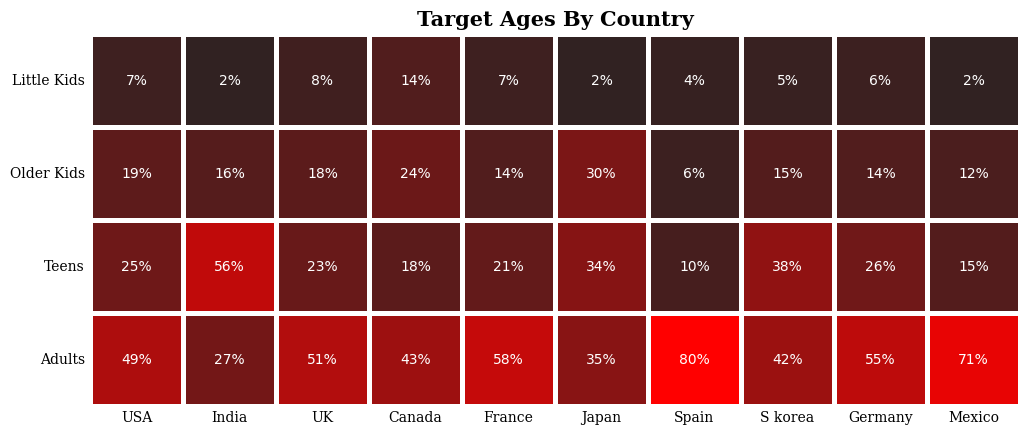

In [48]:
#setting the plot style
fig,ax = plt.subplots(figsize = (12,12))

#plotting the visual
color = sns.color_palette("dark:red", as_cmap=True)

sns.heatmap(data = df_heatmap,ax=ax,cmap = color,square = True,linewidth = 2.5,cbar = False,annot = True,fmt = '.0%')

#customizing axis labels
ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif')

#removing axis labels
ax.set_xlabel('')
ax.set_ylabel('')

#removing tick marks but keeping the labels
ax.tick_params(axis = 'both',length = 0)

#setting title to visual
ax.set_title('Target Ages By Country',{'font':'serif', 'size':15,'weight':'bold'})

plt.show()

### Insights

**1. `Teen-Centric` Content in India, Japan and S Korea**

- India and Japan stand out for having a considerably higher percentage of content targeted at "Teens." In Japan the trend continues to Older Kids as well. This suggests that there's a trend towards producing content that appeals to this age group

**2. `Adult-Centric` Content in Spain, Mexico,Germany and France**

- Spain,Mexico,Germany and France have relatively high percentages of content aimed at "Adults." This could reflect a cultural inclination towards producing and consuming more mature content in these countries.

**3. `Balanced Content` in USA,UK and Canada**

- USA,UK and Canada are closey aligned with their Netflix target ages suggesting a similar preference or taste among these markets.

##  Binge Clock: Netflix's Movie and TV Show Runtimes
- **`Analysis of runtimes`** for Movies and TV shows on Netflix

In [49]:
tv_duration = df.loc[df['type'] == 'TV Show','duration'].value_counts().reset_index()
tv_duration

,duration,count
0,1 Season,1793
1,2 Seasons,425
2,3 Seasons,199
3,4 Seasons,95
4,5 Seasons,65
5,6 Seasons,33
6,7 Seasons,23
7,8 Seasons,17
8,9 Seasons,9
9,10 Seasons,7


In [50]:
#creating a df for tv show duration count
tv_duration = df.loc[df['type'] == 'TV Show','duration'].value_counts().reset_index()
# tv_duration.rename(columns = {'duration': 'Season'}, axis=1, inplace=True)
#binning the seasons with less count for better analysis
tv_duration.replace({'1 Season':'1S',
                    '2 Seasons':'2S to 3S','3 Seasons':'2S to 3S',
                      '4 Seasons':'4S to 6S','5 Seasons':'4S to 6S','6 Seasons':'4S to 6S',
                     '7 Seasons':'7S to 9S','8 Seasons':'7S to 9S','9 Seasons':'7S to 9S',
                    '10 Seasons':'10S to 17S','11 Seasons':'10S to 17S','12 Seasons':'10S to 17S','13 Seasons':'10S to 17S',
                     '14 Seasons':'10S to 17S','15 Seasons':'10S to 17S','16 Seasons':'10S to 17S','17 Seasons':'10S to 17S'},
                    inplace = True)

tv_duration.rename({'duration':'Season','count':'Count'},axis = 1,inplace = True)

#grouping the seasons and finding the count
tv_duration = tv_duration.groupby('Season')['Count'].sum().sort_values(ascending = False).reset_index()


tv_duration

,Season,Count
0,1S,1793
1,2S to 3S,624
2,4S to 6S,193
3,7S to 9S,49
4,10S to 17S,17


In [51]:
#creating a df for movie's duration count
movie_duration = df.loc[df['type'] == 'Movie','duration'].value_counts().reset_index()

#removing 'min' from every entry to help in binning process
movie_duration['duration'] = movie_duration['duration'].str.replace(' min', '', regex=False)

# #converting the movie duration entries into integers
movie_duration['duration'] = movie_duration['duration'].astype('int')

# #binning the values into categories
bin_range = [0,30,90,150,210,float('inf')]
bin_labels = ['Short Films', 'Medium Films', 'Standard Films', 'Long Films ', 'Epic Films ']

movie_duration['duration'] = pd.cut(movie_duration['duration'],bins = bin_range,labels = bin_labels)

# #grouping the different movie types and finding the count
movie_duration = movie_duration.groupby('duration')['count'].sum().sort_values(ascending = False).reset_index()

movie_duration.rename({'duration':'Film Length','count':'Count'},axis = 1,inplace = True)

movie_duration

,Film Length,Count
0,Standard Films,3893
1,Medium Films,1863
2,Long Films,234
3,Short Films,130
4,Epic Films,11


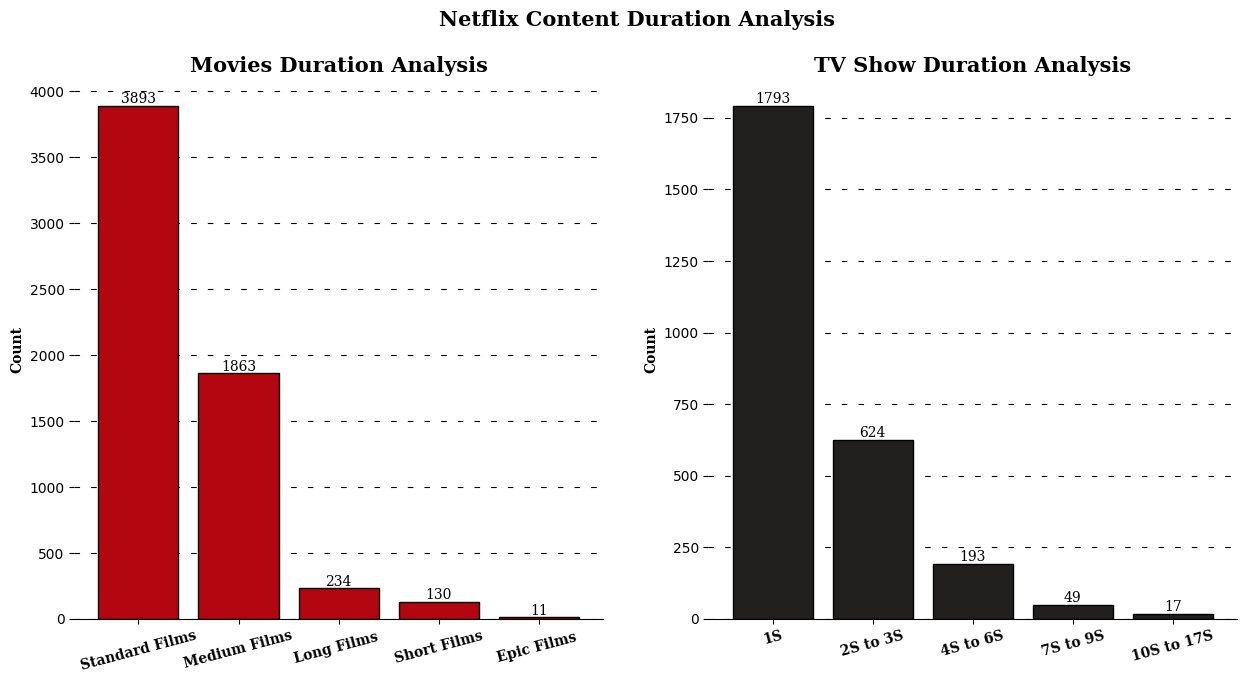

In [52]:
#setting the plot style
fig = plt.figure(figsize = (15,7))
gs = fig.add_gridspec(1,2)

# creating visual for movies duration analysis
ax0 = fig.add_subplot(gs[0,0])

color_map = ['LightCoral','Salmon','DarkSalmon','LightSalmon','Crimson']
ax0.bar(movie_duration['Film Length'],height = movie_duration['Count'],edgecolor='black',color = '#b20710',zorder = 2)

#adding valuecounts
for i in movie_duration.index:
    ax0.text(movie_duration.loc[i,'Film Length'],movie_duration.loc[i,'Count'] + 50, movie_duration.loc[i,'Count'],
           {'font':'serif', 'size':10},ha = 'center',va = 'center')

#setting grid style
ax0.grid(color = 'black',linestyle = '--',axis = 'y',zorder = 0,dashes = (5,10))

#customizing the x-axis labels
ax0.set_xticklabels(movie_duration['Film Length'],fontweight = 'bold',fontfamily='serif',rotation = 15)
ax0.set_ylabel('Count',fontweight = 'bold',fontfamily='serif')

#removing the axis lines

for s in ['top','left','right']:
    ax0.spines[s].set_visible(False)


#setting title for visual
ax0.set_title('Movies Duration Analysis',{'font':'serif', 'size':15,'weight':'bold'})

# creating visual for tvshows duration analysis
ax1 = fig.add_subplot(gs[0,1])

color_map = ['lightpink', 'deeppink', 'mediumvioletred', 'darkred', 'firebrick']
ax1.bar(tv_duration['Season'],height = tv_duration['Count'],edgecolor='black',color = '#221f1f',zorder = 2)

#adding valuecounts
for i in tv_duration.index:
    ax1.text(tv_duration.loc[i,'Season'],tv_duration.loc[i,'Count'] + 25, tv_duration.loc[i,'Count'],
           {'font':'serif', 'size':10},ha = 'center',va = 'center')

#setting grid style
ax1.grid(color = 'black',linestyle = '--',axis = 'y',zorder = 0,dashes = (5,10))

#customizing the x-axis labels
ax1.set_xticklabels(tv_duration['Season'],fontweight = 'bold',fontfamily='serif',rotation = 15)
ax1.set_ylabel('Count',fontweight = 'bold',fontfamily='serif')

#removing the axis lines

for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)

#setting title for visual
ax1.set_title('TV Show Duration Analysis',
            {'font':'serif', 'size':15,'weight':'bold'})

#setting overall title
fig.suptitle('Netflix Content Duration Analysis',fontproperties = {'family':'serif', 'size':15,'weight':'bold'})

plt.show()

###  Insights

**1. Movies**

- The majority of films fall under the **"Standard Films"** category,indicating that viewers prefer movies that are of typical length for a movie-watching experience.


- The higher count of **"Medium Films"** also indicates that viewers are interested in movies that are slightly longer than average, suggesting that movies with a bit more depth and storytelling might be well-received.


- The presence of **"Long Films", "Short Films" and "Epic Films"** in the content library indicates that Netflix caters to a wide range of viewer preferences.


**2. TV Shows**

-  TV shows with a **single season (1S) are the most common**, suggesting that shorter series or limited series are popular on Netflix.


- As the **season duration increases, the count of TV shows decreases**. This pattern indicates that viewers might prefer shorter series over longer ones

## Navigating the Time Lag from Release to Stream

- **`Analysing the time difference`** between release and added years for Movies and TV shows on Netflix

In [53]:
#creating df for top 10 movies producing countries
df_movie = df1[df1['type'] == 'Movie']
df_movie = df_movie.groupby('country')['title'].nunique().sort_values(ascending = False).reset_index().loc[0:10]

#dropping unknown country column
df_movie = df_movie.drop(3)

#creating df with top 10 movie producing countries and average difference between release year and added year
movie_year = df1[(df1['type'] == 'Movie') & (df1['country'].isin(df_movie['country']))]

#adding the difference column
movie_year['diff'] = movie_year['year_added'] - movie_year['release_year']

#calculating the average diff
movie_year = movie_year.groupby('country')['diff'].mean().round().reset_index().sort_values(by = 'diff',ascending = False)

#converting to int
movie_year['diff'] = movie_year['diff'].astype('int')

movie_year

,country,diff
4,India,8
3,Germany,8
8,United Kingdom,8
9,United States,8
5,Japan,6
2,France,6
6,Mexico,5
0,Canada,4
1,China,4
7,Spain,2


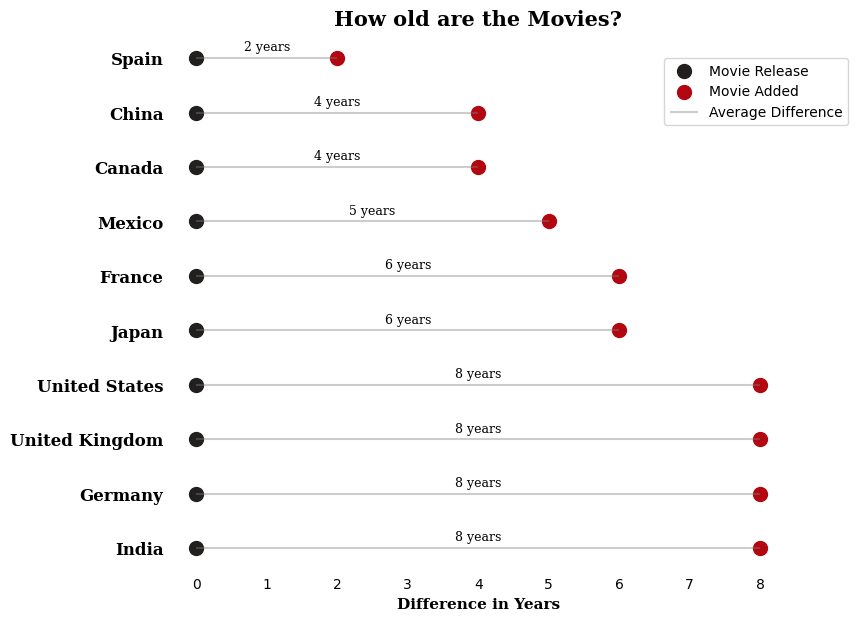

In [54]:
#creating y-axis co-ordinates
yrange = range(1,len(movie_year)+1)
xrange = [0 for i in range(10)]

#setting the plot style
fig, ax = plt.subplots(figsize=(8, 7))


#plotting the scatter points
ax.scatter(xrange,yrange,color = '#221f1f',s=100,label = 'Movie Release')
ax.scatter(movie_year['diff'],yrange,color = '#b20710',s=100,label = 'Movie Added')

#plotting the horizontal lines between the points
ax.hlines(yrange,xmin = 0,xmax = movie_year['diff'],color = 'grey',alpha = 0.4,label = 'Average Difference')

#adding avg. difference values on lines
for i in range(10):
    ax.text(movie_year['diff'].iloc[i]/2,yrange[i]+0.2,f"{movie_year['diff'].iloc[i]} years",
            {'font':'serif', 'size':9,'fontweight':'light'},ha = 'center',va = 'center')

#removing the axislines
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

#removing tick marks but keeping the labels
ax.tick_params(axis = 'both',length = 0)

#customizing the y-axis labels
ax.set_yticks(yrange,movie_year['country'],fontsize= 12,fontfamily='serif',fontweight = 'bold')

#adding xlabel
ax.set_xlabel('Difference in Years',fontfamily='serif',fontsize = 11,fontweight = 'bold')

#Adding title to the graph
ax.set_title('How old are the Movies?',{'font':'serif', 'size':15,'weight':'bold'})

#adding legend
plt.legend(loc = (0.8,0.83))


plt.show()

In [55]:
#creating df for top 10 tv shows producing countries
df_tv = df1[df1['type'] == 'TV Show']
df_tv = df_tv.groupby('country')['title'].nunique().sort_values(ascending = False).reset_index().loc[0:10]

#dropping unknown country column
df_tv = df_tv.drop(1)

#creating df with top 10 tv shows producing countries and average difference between release year and added year
tv_year = df1[(df1['type'] == 'TV Show') & (df1['country'].isin(df_tv['country']))]

#adding the difference column
tv_year['diff'] = tv_year['year_added'] - tv_year['release_year']

#calculating the average diff
tv_year = tv_year.groupby('country')['diff'].mean().round().reset_index().sort_values(by = 'diff',ascending = False)

#converting to int
tv_year['diff'] = tv_year['diff'].astype('int')

tv_year

,country,diff
4,Japan,5
0,Australia,4
9,United States,3
2,France,3
7,Taiwan,3
1,Canada,2
8,United Kingdom,2
5,South Korea,2
3,India,1
6,Spain,1


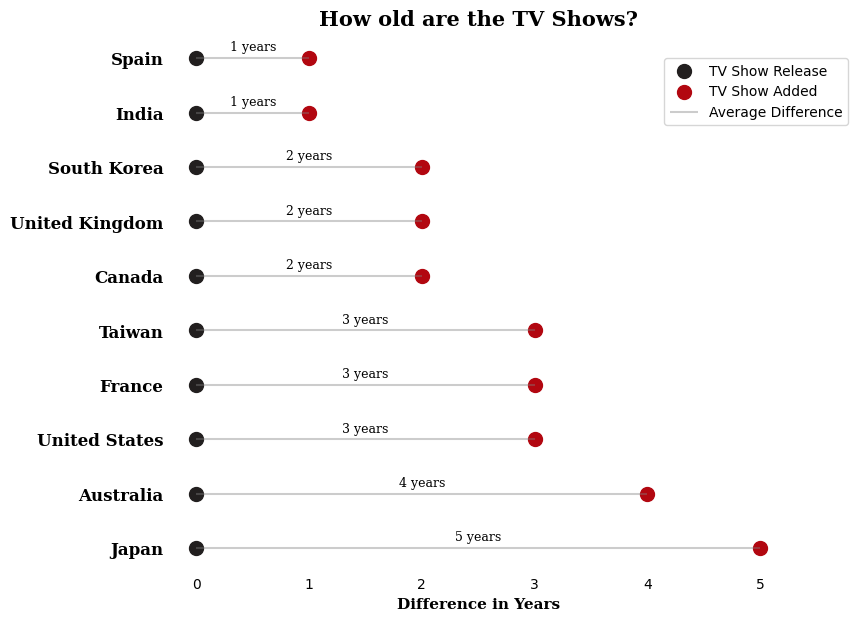

In [56]:
#creating y-axis co-ordinates
yrange = range(1,len(tv_year)+1)
xrange = [0 for i in range(10)]

#setting the plot style
fig, ax = plt.subplots(figsize=(8, 7))


#plotting the scatter points
ax.scatter(xrange,yrange,color = '#221f1f',s=100,label = 'TV Show Release')
ax.scatter(tv_year['diff'],yrange,color = '#b20710',s=100,label = 'TV Show Added')

#plotting the horizontal lines between the points
ax.hlines(yrange,xmin = 0,xmax = tv_year['diff'],color = 'grey',alpha = 0.4,label = 'Average Difference')

#adding avg. difference values on lines
for i in range(10):
    ax.text(tv_year['diff'].iloc[i]/2,yrange[i]+0.2,f"{tv_year['diff'].iloc[i]} years",
            {'font':'serif', 'size':9,'fontweight':'light'},ha = 'center',va = 'center')

#removing the axislines
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

#removing tick marks but keeping the labels
ax.tick_params(axis = 'both',length = 0)

#customizing the y-axis labels
ax.set_yticks(yrange,tv_year['country'],fontsize= 12,fontfamily='serif',fontweight = 'bold')

#adding xlabel
ax.set_xlabel('Difference in Years',fontfamily='serif',fontsize = 11,fontweight = 'bold')

#Adding title to the graph
ax.set_title('How old are the TV Shows?',{'font':'serif', 'size':15,'weight':'bold'})

#adding legend
plt.legend(loc = (0.8,0.83))


plt.show()

### Insights

**1. Movies Vs TV Shows**

- In general, there seems to be a **trend of adding movies to Netflix with a longer delay compared to TV shows**. This could indicate that viewers might have a higher demand for recent TV shows than movies.

**2. Variation in Regional Preferences**

- `Spain` has the lowest delay for movies (2 years) and TV shows (1 year), which could suggest that Spanish viewers have a preference for more recent content.


- Countries like `India, UK,USA and France` have in general more delay in movies (8 to 6 years) and very less delay in TV Shows (1 to 3 years) indicating preference for recent TV shows and older movies in these countries.


- `Japan` has a consistent delay (5 to 6 years) in both Movies and TV Shows.


##  Genre Galore

- `Analysis of different genre's` for Movies and TV Shows present on Netflix.

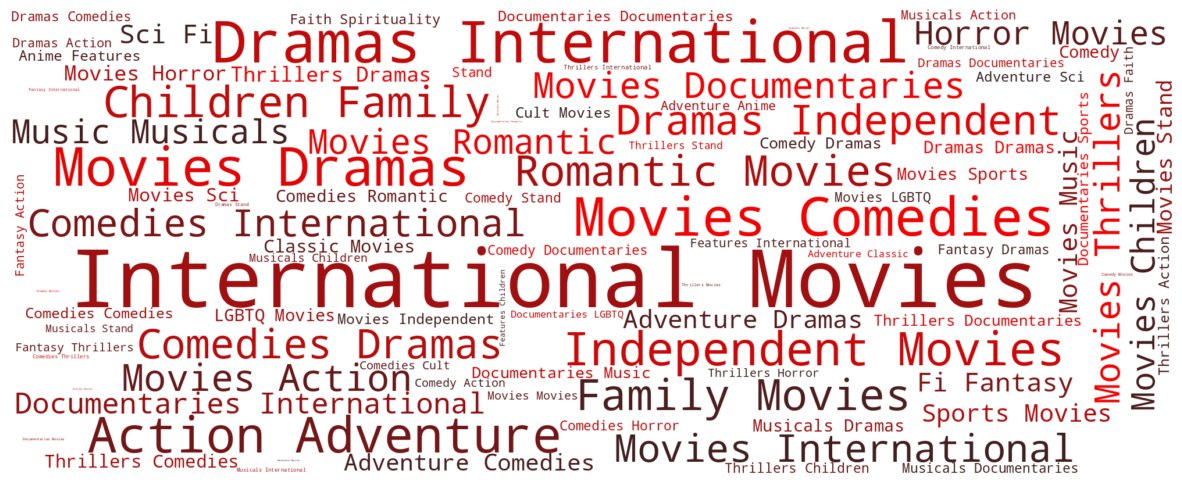

In [57]:
movie_genre = df[df['type'] == 'Movie']

text = str(list(movie_genre['listed_in'])).replace(',','').replace("'",'').replace('"','').replace('[','').replace(']','')

color = sns.color_palette("dark:red", as_cmap=True)

wordcld = WordCloud(max_words = 150, width = 2000,  height = 800,background_color = 'white',colormap = color).generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcld,interpolation = 'bilinear')
plt.axis('off')
plt.show()

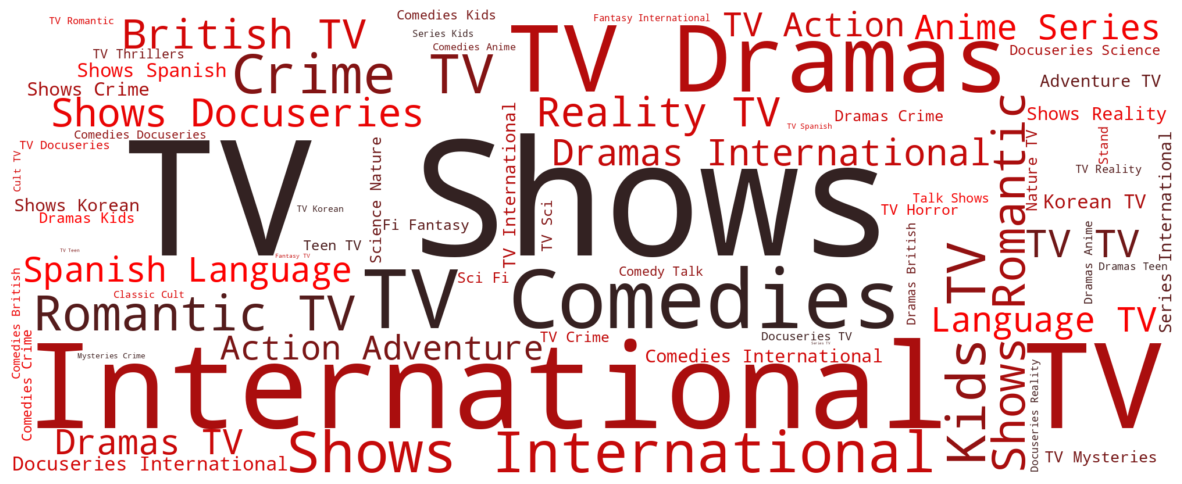

In [58]:
tv_genre = df[df['type'] == 'TV Show']

text = str(list(tv_genre['listed_in'])).replace(',','').replace("'",'').replace('"','').replace('[','').replace(']','')

color = sns.color_palette("dark:red", as_cmap=True)

wordcld = WordCloud(max_words = 150, width = 2000,  height = 800,background_color = 'white',colormap = color).generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcld,interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Insights

- Popular `Movie` genres on Netflix include **International Movies, Comedies, Dramas, Action, and Romantic films.**


- Among `TV Shows` on Netflix, popular genres encompass **Drama, Crime, Romance, Kids' content, Comedies, and International series.**

# 4. Business Recommendations

**1. Investment in Localized Content**

- The data suggests that catering to local preferences is crucial for success. Netflix should continue to invest in producing content that resonates with different cultural and linguistic preferences around the world.


- Given the popularity of TV shows in Asian countries, particularly South Korea and Japan, Netflix should increase its investment in producing and acquiring Asian TV shows.


- Acknowledging the European preference for movies, Netflix should prioritize curating a diverse and engaging movie library that caters to the tastes of European viewers.


- Given the significant investment in content production in the USA and the emphasis on India, Netflix should continue to focus on these markets.

**2. Strategic Release Timing**

- `Monthly Strategy`

    - Focusing on releasing high-quality content during the months of January, July, August, October, and December could lead to increased viewer interest and engagement as these months have historically seen higher content upload counts, indicating higher demand during those periods.
    

- `Weekly Strategy`
    - The first week of each month can be designated as a "Featured Release Week," where the platform introduces a major TV show or movie. Subsequently, during the three-week period of reduced content additions, the platform can leverage this time to promote and highlight existing content

**3. Age-Targeted Content Expansion**

- In India and Japan, where there is a high demand for teen-centric content, Netflix could partner with local production studios  to develop original series and movies that resonate with the teenage audience.


- For countries like Spain, Mexico, Germany, and France, where adult-centric content is favored, Netflix should invest in creating mature and sophisticated original content that aligns with the cultural sensibilities of these regions.

**4. Diverse Runtimes**

-  Since viewers prefer movies of standard length, Netflix should continue producing standard films that offer a well-rounded movie-watching experience. However, the popularity of "Medium length Films" suggests that there's an appetite for movies with more depth and storytelling.


- Recognizing the popularity of shorter TV series, Netflix should continue focusing on producing limited series and shorter season formats. This approach aligns with viewer preferences for consuming content in manageable episodes.

**5. Optimizing Content Acquisition Strategy**

- Given the trend of faster availability of TV shows compared to movies, Netflix could work on acquiring more recent movies and reducing the time lag between their theatrical release and availability on the platform. This could cater to the audience's preference for up-to-date TV shows and movies.